https://aiforsocialgood.github.io/icml2019/accepted/track1/pdfs/20_aisg_icml2019.pdf

- Because the quantity of label data can be sparse, we use the
histogram dimensionality reduction technique detailed in
You et al. to combat overfitting. This technique assumes that
the location of each pixel value within an image I is unimportant for this task relative to the quantity and distribution
of pixel values => make a historygram out of an image

https://www.sciencedirect.com/science/article/pii/S0034425719304791?via%3Dihub

- The EVI/VOD lag outperforms common single-sensor metrics for crop yield estimation.

- Interestingly, the anomalies of VIs during the growing season have also been used to predict changes in crop yield (Zhang et al., 2010). But commonly, the dominant approach integrates a single or multi-year time series of VIs with statistical regression models either in the form of seasonal or annual metrics.
- Microwave vegetation optical-depth. The vegetation optical depth (VOD) is a parameter accounting for the attenuation of microwave signals naturally emitted by the soil as they pass through the vegetation canopy (Long and Ulaby, 2014). It is sensitive to the canopy structure and the amount of living biomass, being directly proportional to the volumetric water content of vegetation (Jackson and Schmugge, 1991; Grant et al., 2016; Alemu and Henebry, 2017). Also, it is relatively insensitive to signal degradation from solar illumination and atmospheric effects, which makes them an ideal piece of information for phenology and crop production studies
- Use a specific time window
- It can be noted that microwave data in the form of VOD attains better results using the integral and the PC1 metrics, whereas EVI leads to better results using the maximum.

https://www.nature.com/articles/nclimate1832

- Further empirical work using daily weather data has found that the main culprit for this negative association is the sensitivity of maize to extreme heat (defined here as accumulation of degree days above 30 °C), in both temperate1 and tropical2 systems.

https://royalsocietypublishing.org/doi/10.1098/rstb.2019.0510
- weather contributes
1. Could the speed of growth/progress over time( greeness, higher water volume, other metrics). Indicate the yield.
2. Are any distinct patterns that would indicate a crop failure? How to define such a failure

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
era5=pd.read_csv("/home/tigertammi13/Desktop/ICDS-2021/Crops_Yield_Prediction_Challenge/ERA5.csv")
era5['t2m']=(era5['t2m']-273.15)
era5['time']=pd.to_datetime(era5['time'])
era5.sort_values('time',inplace=True)
print(era5.info())
print(era5.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328680 entries, 258480 to 250487
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   lat     328680 non-null  float64       
 1   long    328680 non-null  float64       
 2   time    328680 non-null  datetime64[ns]
 3   t2m     328680 non-null  float64       
 4   county  328680 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 15.0+ MB
None
                 lat           long            t2m
count  328680.000000  328680.000000  328680.000000
mean       40.024808     -89.265170      13.935833
std         1.346492       0.936346      11.508596
min        37.250000     -91.250000     -25.951407
25%        39.000000     -90.000000       4.632883
50%        40.000000     -89.250000      15.076883
75%        41.000000     -88.500000      24.049768
max        42.500000     -87.750000      39.362543


In [4]:
evi=pd.read_csv("/home/tigertammi13/Desktop/ICDS-2021/Crops_Yield_Prediction_Challenge/EVI.csv")
print(evi.info())
print(evi.describe())

evi.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391200 entries, 0 to 2391199
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   county  object 
 1   long    float64
 2   lat     float64
 3   year    int64  
 4   evi     float64
 5   day     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 109.5+ MB
None
               long           lat          year           evi           day
count  2.391200e+06  2.391200e+06  2.391200e+06  2.391200e+06  2.391200e+06
mean  -8.922820e+01  4.012561e+01  2.009782e+03  3.094701e+03  1.774116e+02
std    9.804733e-01  1.252971e+00  5.480874e+00  4.420004e+03  1.058494e+02
min   -9.152500e+01  3.697500e+01  2.001000e+03 -2.989618e+03  1.000000e+00
25%   -8.997500e+01  3.922500e+01  2.005000e+03  1.504156e+03  8.100000e+01
50%   -8.917500e+01  4.012500e+01  2.010000e+03  2.202866e+03  1.770000e+02
75%   -8.842500e+01  4.107500e+01  2.015000e+03  4.162980e+03  2.730000e+02
max   -8.747500e+01  4.252500e+01  2.019000

,county,long,lat,year,evi,day
0,ADAMS,-91.525,40.125,2003,-2269.190909,49
1,ADAMS,-91.525,40.075,2003,106.627273,49
2,ADAMS,-91.475,40.075,2003,-1564.628099,49
3,ADAMS,-91.475,40.025,2003,234.900000,49
4,ADAMS,-91.425,40.075,2003,-2951.487603,49


In [5]:
evi_stacked=pd.read_csv("/home/tigertammi13/Desktop/ICDS-2021/Crops_Yield_Prediction_Challenge/EVI_stacked.csv")
print(evi_stacked.describe())
print(evi_stacked.info())
evi_stacked.head(5)




#Illinois Coordinates
print(evi['long'].min())
print(evi['long'].max())
print(evi['lat'].min())
print(evi['lat'].max())

               year          long           lat         evi_1        evi_17  \
count  95418.000000  95418.000000  95418.000000  95418.000000  95418.000000   
mean    2009.028852    -89.224441     40.182692      0.111379      0.103829   
std        5.540395      0.977407      1.254825      0.074800      0.077502   
min     2001.000000    -91.525000     36.975000     -0.298529     -0.664722   
25%     2004.000000    -89.975000     39.275000      0.068076      0.041032   
50%     2008.000000    -89.175000     40.225000      0.128596      0.121203   
75%     2015.000000    -88.425000     41.125000      0.160857      0.158670   
max     2019.000000    -87.475000     42.525000      0.422963      0.447087   

             evi_33        evi_49        evi_65        evi_81        evi_97  \
count  95418.000000  95418.000000  95418.000000  95418.000000  95418.000000   
mean       0.103493      0.122539      0.147131      0.174276      0.208466   
std        0.077552      0.067753      0.053175    

In [6]:
il_yield=pd.read_csv("./Crops_Yield_Prediction_Challenge/IL_yield.csv")
il_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9622 entries, 0 to 9621
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    9622 non-null   int64  
 1   county  9622 non-null   object 
 2   yield   9622 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 225.6+ KB


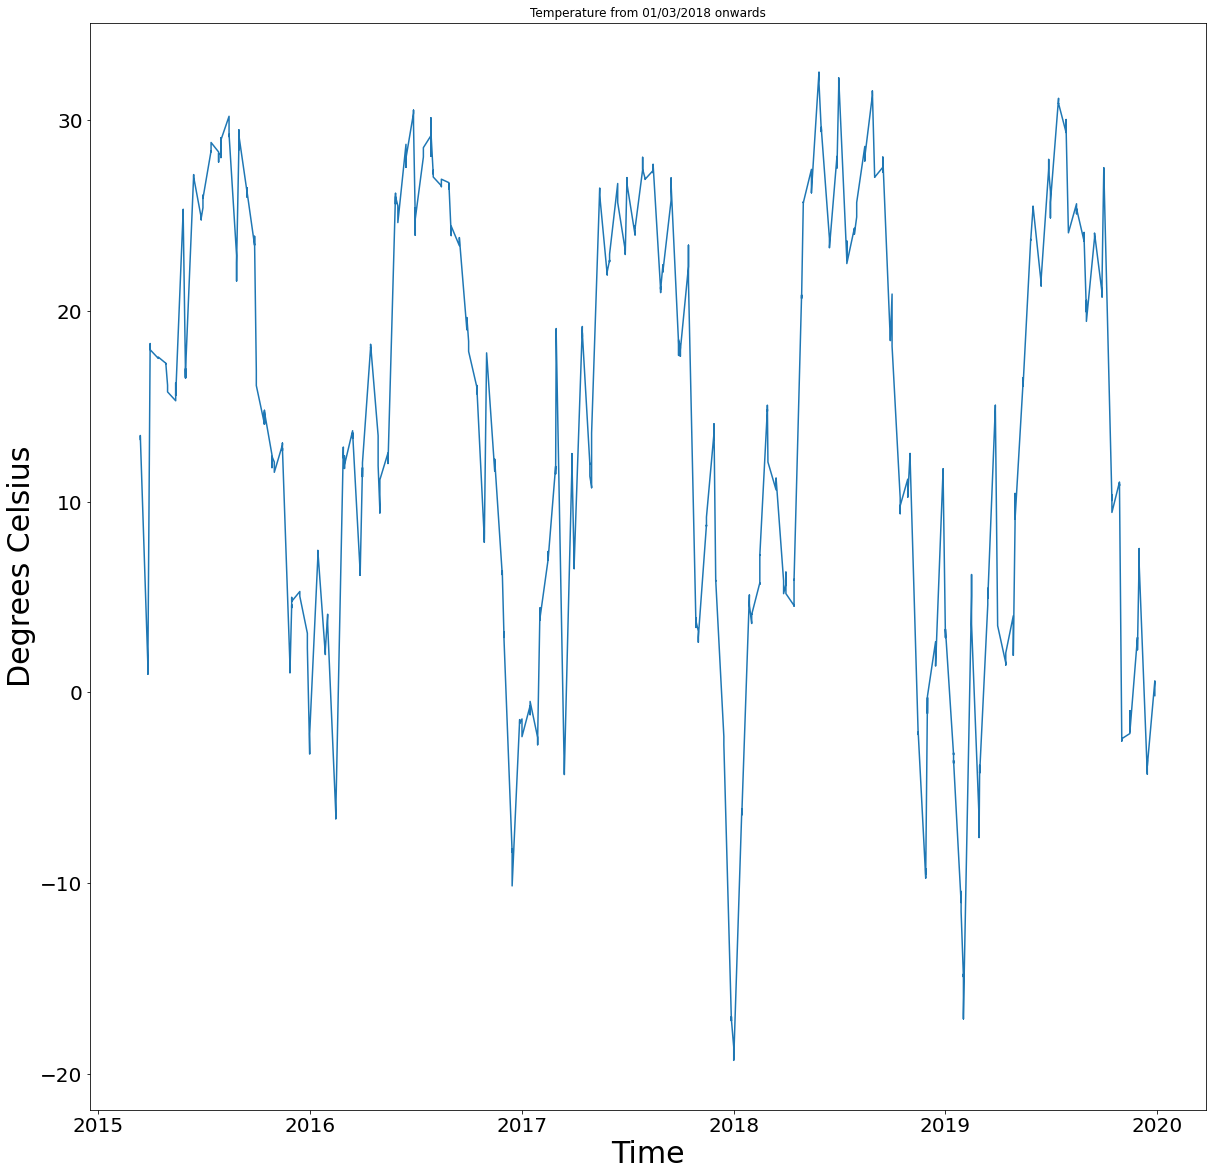

In [7]:
counties = era5['county'].unique()
county=counties[0]
x=era5[(era5['county']==county)&(era5['time']>pd.to_datetime("2015-03-01"))]
plt.figure(figsize=(20,20))
plt.plot(x['time'],x['t2m'])
plt.title(county)
plt.xlabel("Time",fontsize=30)
plt.ylabel("Degrees Celsius",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Temperature from 01/03/2018 onwards")



plt.show()

In [8]:
# data_yield=il_yield.loc[(2018<il_yield['year']) ]
# data_era5=era5.loc[(pd.to_datetime("2019-01-01")<era5['time'])]
# data=data_era5.groupby([data_era5['time'],'county'])['t2m'].mean()
# data_era5=data_era5.groupby('county')
# yield_per_county_2019=data_era5.merge(data_yield,"inner",on='county')
# yield_per_county_2019.sort_values(['yield'],inplace=True)
# y=yield_per_county_2019.groupby('county')['t2m'].agg('mean')
# print(yield_per_county_2019.head(5))
# print(y.head())
#
# plt.bar(yield_per_county_2019[y.index==yield_per_county_2019['county'].unique()]['yield'],y)
# plt.show()

        lat  long       time        t2m county  year  yield
1645  42.25 -88.0 2019-01-15  -3.821265   LAKE  2019  129.0
1666  42.25 -88.0 2019-08-15  20.468988   LAKE  2019  129.0
1667  42.25 -88.0 2019-08-28  24.305902   LAKE  2019  129.0
1668  42.25 -88.0 2019-09-01  19.620172   LAKE  2019  129.0
1669  42.25 -88.0 2019-09-15  23.391534   LAKE  2019  129.0
county
ADAMS        13.075944
ALEXANDER    17.107001
BOND         15.306429
BOONE         9.561608
BUREAU       10.636057
Name: t2m, dtype: float64


ValueError: Item wrong length 74 instead of 6475.

In [11]:
weather=pd.read_csv("data2.csv")
print(weather.info(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49853485 entries, 0 to 49853484
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Latitude    object
 1    Longitude  object
 2    Value      object
dtypes: object(3)
memory usage: 1.1+ GB
None


In [12]:
print(weather.describe())


        Latitude   Longitude   Value
count   49853485       21703   21703
unique  34885276           1       1
top     Latitude   Longitude   Value
freq       21703       21703   21703


In [22]:
small=pd.read_csv("weather_small.csv",names=["Lat","Lon","Val","Snow"])
print(small.info())


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820480 entries, 0 to 8820479
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Lat     object 
 1   Lon     object 
 2   Val     object 
 3   Snow    float64
dtypes: float64(1), object(3)
memory usage: 269.2+ MB
None
